<a href="https://colab.research.google.com/github/yebiFesseha/Box_Office_ML_Prediction/blob/master/LogisticRegressionBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import style
style.use('ggplot')

%matplotlib inline

In [35]:
math.e

2.718281828459045

In [24]:
# [1 / (1 + np.exp(i)) for i in np.arange(-11,12)]
# [1 / (1 + math.e**i) for i in np.arange(-11,12)]
[1 / (1 + np.e**i) for i in np.arange(-11,12)]

[0.999983298578152,
 0.9999546021312976,
 0.9998766054240137,
 0.9996646498695336,
 0.9990889488055994,
 0.9975273768433653,
 0.9933071490757153,
 0.9820137900379085,
 0.9525741268224331,
 0.8807970779778823,
 0.7310585786300049,
 0.5,
 0.2689414213699951,
 0.11920292202211757,
 0.04742587317756679,
 0.017986209962091562,
 0.006692850924284857,
 0.002472623156634775,
 0.0009110511944006456,
 0.00033535013046647827,
 0.0001233945759862318,
 4.539786870243442e-05,
 1.670142184809519e-05]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


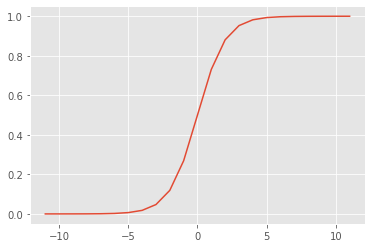

In [32]:
sns.lineplot(np.arange(-11,12), [1 / (1 + np.e**-i) for i in np.arange(-11,12)])
plt.show()

In [7]:
import os

In [11]:
# os.chdir("./")
# os.chdir("sample_data")
print(os.getcwd())
print(os.listdir('/content/sample_data'))

/content
['README.md', 'anscombe.json', 'california_housing_test.csv', 'mnist_test.csv', 'california_housing_train.csv', 'mnist_train_small.csv']


In [12]:
from google.colab import files
files.upload()

Saving pl_dataset.csv to pl_dataset.csv


{'pl_dataset.csv': b',Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP\r\n0,2000-08-19,Charlton,Man City,4,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,18.0,18.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0\r\n1,2000-08-19,Chelsea,West Ham,4,2,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,5.0,9.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-4.0\r\n2,2000-08-19,Coventry,Middlesbrough,1,3,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,14.0,12.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0\r\n3,2000-08-19,Derby,Southampton,2,2,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,16.0,15.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0\r\n4,2000-08-19,Leeds,Everton,2,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,3.0,13.0,1.0

In [16]:
print(os.listdir('/content'))

['.config', 'pl_dataset.csv', 'sample_data']


In [17]:
df = pd.read_csv("/content/pl_dataset.csv")
df.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,2000-08-19,Charlton,Man City,4,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,18.0,18.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,1,2000-08-19,Chelsea,West Ham,4,2,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,5.0,9.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-4.0
2,2,2000-08-19,Coventry,Middlesbrough,1,3,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,14.0,12.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
3,3,2000-08-19,Derby,Southampton,2,2,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,16.0,15.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
4,4,2000-08-19,Leeds,Everton,2,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,3.0,13.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-10.0


In [18]:
#check if there is any null value
[i for i in df.isnull().sum().values if i > 0]

[]

In [19]:
df.columns

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'HomeTeamLP',
       'AwayTeamLP', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts',
       'ATFormPts', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7600 non-null   int64  
 1   Date           7600 non-null   object 
 2   HomeTeam       7600 non-null   object 
 3   AwayTeam       7600 non-null   object 
 4   FTHG           7600 non-null   int64  
 5   FTAG           7600 non-null   int64  
 6   FTR            7600 non-null   object 
 7   HTGS           7600 non-null   int64  
 8   ATGS           7600 non-null   int64  
 9   HTGC           7600 non-null   int64  
 10  ATGC           7600 non-null   int64  
 11  HTP            7600 non-null   float64
 12  ATP            7600 non-null   float64
 13  HM1            7600 non-null   object 
 14  HM2            7600 non-null   object 
 15  HM3            7600 non-null   object 
 16  HM4            7600 non-null   object 
 17  HM5            7600 non-null   object 
 18  AM1     

In [33]:
print(f"strig types\n{df.select_dtypes(include='object').columns}\n")
print(f"numerical types\n{df.select_dtypes(exclude='object').columns}\n")
print(f"int types\n{df.select_dtypes(include='int').columns}\n")
print(f"float types\n{df.select_dtypes(include='float').columns}\n")

strig types
Index(['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HM1', 'HM2', 'HM3', 'HM4',
       'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'HTFormPtsStr',
       'ATFormPtsStr'],
      dtype='object')

numerical types
Index(['Unnamed: 0', 'FTHG', 'FTAG', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP',
       'ATP', 'HomeTeamLP', 'AwayTeamLP', 'MW', 'HTFormPts', 'ATFormPts',
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP'],
      dtype='object')

int types
Index(['Unnamed: 0', 'FTHG', 'FTAG', 'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

float types
Index(['HTP', 'ATP', 'HomeTeamLP', 'AwayTeamLP', 'MW', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts', 'DiffLP']

In [75]:
#convert the datetime data type from object to datetime 
# df['Date'].astype('datetime64')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [35]:
df.nunique()

Unnamed: 0       7600
Date             2027
HomeTeam           44
AwayTeam           44
FTHG               10
FTAG                9
FTR                 2
HTGS               97
ATGS               95
HTGC               82
ATGC               80
HTP               877
ATP               868
HM1                 4
HM2                 4
HM3                 4
HM4                 4
HM5                 4
AM1                 4
AM2                 4
AM3                 4
AM4                 4
AM5                 4
HomeTeamLP         18
AwayTeamLP         18
MW                 38
HTFormPtsStr      353
ATFormPtsStr      363
HTFormPts          15
ATFormPts          15
HTWinStreak3        2
HTWinStreak5        2
HTLossStreak3       2
HTLossStreak5       2
ATWinStreak3        2
ATWinStreak5        2
ATLossStreak3       2
ATLossStreak5       2
HTGD             1228
ATGD             1226
DiffPts          1215
DiffFormPts       512
DiffLP             35
dtype: int64

In [76]:
df_MW = df.loc[df['MW'] > 3, :] 
df_MW.head(3)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
30,30,2000-09-05,Man United,Bradford,6,0,H,5,2,3,1,1.25,1.00,D,D,W,M,M,D,W,L,M,M,1.0,17.0,4.0,DDWMM,DWLMM,5,4,0,0,0,0,0,0,0,0,0.5,0.25,0.25,0.25,-16.0
31,31,2000-09-05,Sunderland,West Ham,1,1,NH,3,4,5,7,0.75,0.25,L,L,W,M,M,D,L,L,M,M,7.0,9.0,4.0,LLWMM,DLLMM,3,1,0,0,0,0,0,0,0,0,-0.5,-0.75,0.50,0.50,-2.0
32,32,2000-09-05,Tottenham,Everton,3,2,H,4,5,4,4,1.00,1.00,L,D,W,M,M,D,W,L,M,M,10.0,13.0,4.0,LDWMM,DWLMM,4,4,0,0,0,0,0,0,0,0,0.0,0.25,0.00,0.00,-3.0


In [85]:
df_MW.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'], axis=1).head()

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
30,H,1.25,1.00,D,D,W,D,W,L,0.50,0.25,0.25,-16.0
31,NH,0.75,0.25,L,L,W,D,L,L,-0.50,-0.75,0.50,-2.0
32,H,1.00,1.00,L,D,W,D,W,L,0.00,0.25,0.00,-3.0
33,NH,0.75,0.50,L,L,W,D,L,D,-0.25,-0.25,0.25,3.0
34,NH,1.00,1.50,D,L,W,W,W,L,0.00,0.75,-0.50,3.0


In [87]:
df_MW = df_MW[['FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']]
df_MW.head()

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
30,H,1.25,1.00,D,D,W,D,W,L,0.50,0.25,0.25,-16.0
31,NH,0.75,0.25,L,L,W,D,L,L,-0.50,-0.75,0.50,-2.0
32,H,1.00,1.00,L,D,W,D,W,L,0.00,0.25,0.00,-3.0
33,NH,0.75,0.50,L,L,W,D,L,D,-0.25,-0.25,0.25,3.0
34,NH,1.00,1.50,D,L,W,W,W,L,0.00,0.75,-0.50,3.0


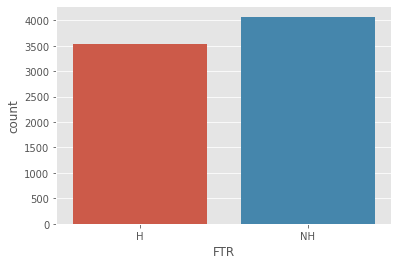

In [109]:
sns.countplot(x = df['FTR'])
plt.show()

In [123]:
print(f"Home wins of {len(df.loc[df['FTR']=='H'])} over total games of {len(df)} since 2019 in percentage is: {round(len(df.loc[df['FTR']=='H'])/len(df.index) * 100, 2)}%")

Home wins of 3529 over total games of 7600 since 2019 in percentage is: 46.43%


In [143]:
print(f"matches won and positive GF percentage: {round(len(df.loc[(df['HTGD'] > 0) & (df['FTR'] == 'H')])/len(df['FTR']) * 100,2)}%")

matches won and positive GF percentage: 23.89%


In [144]:
df_MW.corr()

,HTP,ATP,HTGD,ATGD,DiffFormPts,DiffLP
HTP,1.000000,0.015121,0.924112,-0.008976,0.517999,-0.450737
ATP,0.015121,1.000000,-0.000610,0.922892,-0.504117,0.454694
HTGD,0.924112,-0.000610,1.000000,-0.005130,0.466885,-0.471394
ATGD,-0.008976,0.922892,-0.005130,1.000000,-0.464809,0.474296
DiffFormPts,0.517999,-0.504117,0.466885,-0.464809,1.000000,-0.400442
DiffLP,-0.450737,0.454694,-0.471394,0.474296,-0.400442,1.000000


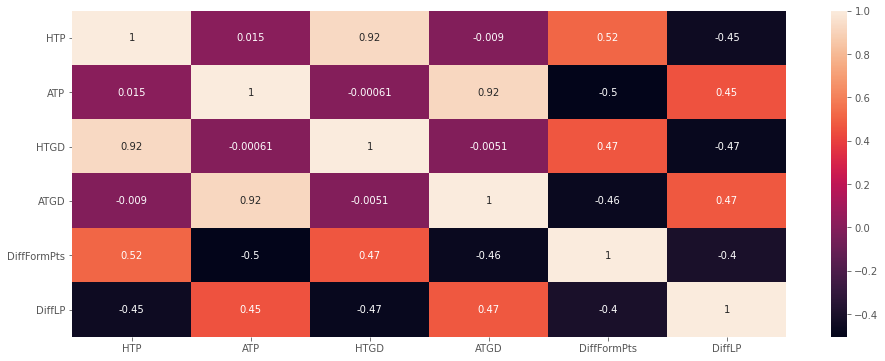

In [145]:
plt.figure(figsize=(16,6))
sns.heatmap(df_MW.corr(), annot=True)

## Modelling Preparation

In [274]:
# drop target and assign to X and y assign to target
X = df_MW.drop(['FTR'], axis='columns')
y = df_MW['FTR']

In [258]:
from sklearn.preprocessing import MinMaxScaler, scale, RobustScaler

In [275]:
# scale(X['HTP']) instead used a column transformer with pipline

In [276]:
# for col in df_MW.select_dtypes(exclude='object').columns:
#   X[col] = scale(X[col])

In [277]:
X.select_dtypes(exclude='object').head()

,HTP,ATP,HTGD,ATGD,DiffFormPts,DiffLP
30,1.25,1.00,0.50,0.25,0.25,-16.0
31,0.75,0.25,-0.50,-0.75,0.50,-2.0
32,1.00,1.00,0.00,0.25,0.00,-3.0
33,0.75,0.50,-0.25,-0.25,0.25,3.0
34,1.00,1.50,0.00,0.75,-0.50,3.0


In [278]:
X.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
HTP,7000.0,1.272204,0.479558,0.000000,0.933333,1.200000,1.588235,2.821429
ATP,7000.0,1.284808,0.476733,0.000000,0.944444,1.214286,1.600000,2.821429
HTGD,7000.0,-0.006766,0.703359,-2.250000,-0.500000,-0.107143,0.409091,3.200000
ATGD,7000.0,0.011766,0.701988,-2.285714,-0.485065,-0.090909,0.428571,3.500000
DiffFormPts,7000.0,-0.012886,0.364096,-2.250000,-0.176471,0.000000,0.153846,2.250000
DiffLP,7000.0,-0.003143,8.042784,-17.000000,-6.000000,0.000000,6.000000,17.000000


# Encoders, Columns Transformers and Pipline

In [216]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=1, stratify = y)

In [281]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(5250, 12) (1750, 12)
(5250,) (1750,)


In [282]:
cat_cols = [col for col in X.select_dtypes(include='object').columns]
num_cols = [col for col in X.select_dtypes(exclude='object').columns]
print(cat_cols)
print(num_cols)

['HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3']
['HTP', 'ATP', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']


In [253]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [284]:
ct = ColumnTransformer([
                        ('step1', MinMaxScaler(), num_cols),
                        ('step2', ohe, cat_cols),
                      ], remainder ='passthrough'
                       )

In [285]:
ct

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('step1',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['HTP', 'ATP', 'HTGD', 'ATGD', 'DiffFormPts',
                                  'DiffLP']),
                                ('step2',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3'])],
                  verbose=False)

In [286]:
#pipeline
my_pipe = Pipeline([
            ('coltran', ct),
            ('clf', SVC())
          ])

In [287]:
my_pipe

Pipeline(memory=None,
         steps=[('coltran',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('step1',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                                                                              1)),
                                                  ['HTP', 'ATP', 'HTGD', 'ATGD',
                                                   'DiffFormPts', 'DiffLP']),
                                                 ('step2',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.fl

In [298]:
my_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('coltran',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('step1',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                                                                              1)),
                                                  ['HTP', 'ATP', 'HTGD', 'ATGD',
                                                   'DiffFormPts', 'DiffLP']),
                                                 ('step2',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.fl

In [314]:
print(f"The one hot encoded feature names are:\n{my_pipe.named_steps['coltran'].transformers_[1][1].get_feature_names()}")

The one hot encoded feature names are:
['x0_D' 'x0_L' 'x0_W' 'x1_D' 'x1_L' 'x1_W' 'x2_D' 'x2_L' 'x2_W' 'x3_D'
 'x3_L' 'x3_W' 'x4_D' 'x4_L' 'x4_W' 'x5_D' 'x5_L' 'x5_W']


In [316]:
y_pred = my_pipe.predict(X_test)
y_pred

array(['NH', 'NH', 'H', ..., 'H', 'NH', 'NH'], dtype=object)

In [319]:
my_pipe.score(X_test, y_test)

0.6302857142857143

In [323]:
from sklearn.metrics import accuracy_score

In [330]:
print(f"The accuracy using accuracy score is = {round(accuracy_score(y_test, y_pred)*100,2)}%")
print(f"The accuracy using the pipeline is = {round(my_pipe.score(X_test, y_test)*100,2)}%")

The accuracy using accuracy score is = 63.03%
The accuracy using the pipeline is = 63.03%
